<a href="https://colab.research.google.com/github/krmonline/ReinforcementLearning/blob/main/Qlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fac1 = 4
fac2 = 9
fac3 = 2
n = 4
e = 6
w = 2
s = 3
total_stage = (fac1+1) * (fac2+1) * (fac3+1) * (n+1) * (e+1) * (w+1) * (s+1)
total_action = 12
Qtable = np.zeros([total_stage,total_action+1])
Qtable.shape
QtableCum = Qtable

In [ ]:
df = pd.DataFrame(columns=['f1','f2','f3','n','e','w','s'])
MapRevTable = np.zeros([fac1+1,fac2+1,fac3+1,n+1,e+1,w+1,s+1])
facTable = np.zeros([total_stage]).astype("str")
num = 0
for i0 in range(s+1):
  for i1 in range(w+1):
    for i2 in range(e+1):
      for i3  in range(n+1):
        for i4 in range(fac3+1):
          for i5 in range(fac2+1):
            for i6 in range(fac1+1):
              #print(num,i6,i5,i4,i3,i2,i1)
              facTable[num] = str(i6)+","+str(i5)+","+str(i4)+","+str(i3)+","+str(i2)+","+str(i1)+","+str(i0)
              MapRevTable[i6][i5][i4][i3][i2][i1][i0] = num
              num = num+1
dfMapTable = pd.DataFrame(facTable,columns=['state'])

In [ ]:
dfMapTable.tail()

,state
62995,"0,9,2,4,6,2,3"
62996,"1,9,2,4,6,2,3"
62997,"2,9,2,4,6,2,3"
62998,"3,9,2,4,6,2,3"
62999,"4,9,2,4,6,2,3"


In [ ]:
def step(state,action,mby):
  #print("state=",state,"action=",action)
  maxF1 = 4
  maxF2 = 9
  maxF3 = 2
  maxn = 4
  maxe = 6
  maxw = 2
  maxs = 3
  r = 0
  stateText = dfMapTable.iloc[state]['state']
  #Conv state to array
  f1,f2,f3,n,e,w,s = stateText.split(",")
  f1,f2,f3,n,e,w,s = int(f1),int(f2),int(f3),int(n),int(e),int(w),int(s)
  #print(f1,f2,f3,n,e,w,s)
  #4,9,2,4,6,2,3 => f1,f2,f3,n,e,w,s
  #Defined Action 1-12
  r = -100
  oldResult = mby[0]*7+mby[1]*5+mby[2]*5+mby[3]*1+mby[4]*9+mby[5]*7+mby[6]*5+mby[7]*2+mby[8]*4+mby[9]*4+mby[10]*6+mby[11]*4
  if action == 1:
    if f1 < maxF1 and n < maxn:
      f1 = f1 + 1
      n = n + 1 
      r = -7
      mby[0] = mby[0] + 1
  elif action == 2:
    if f1 < maxF1 and e < maxe:
      f1 = f1 + 1 
      r = -5
      e = e + 1
      mby[1] = mby[1] + 1
  elif action == 3:
    if f1 < maxF1 and w < maxw:
      f1 = f1 + 1 
      w = w + 1
      r = -5
      mby[2] = mby[2] + 1
  elif action == 4:
    if f1 < maxF1 and s < maxs:
      f1 = f1 + 1 
      s = s + 1
      r = -1
      mby[3] = mby[3] + 1
  elif action == 5:
    if f2 < maxF2 and n < maxn:
      f2 = f2 + 1
      n = n + 1
      r = -9
      mby[4] = mby[4] + 1
  elif action == 6:
    if f2 < maxF2 and e < maxe:
      f2 = f2 + 1
      e = e + 1
      r = -7
      mby[5] = mby[5] + 1
  elif action == 7:
    if f2 < maxF2 and w < maxw:
      f2 = f2 + 1
      w = w + 1
      r = -5
      mby[6] = mby[6] + 1
  elif action == 8:
    if f2 < maxF2 and s < maxs:
      f2 = f2 + 1 
      s = s + 1
      r = -2
      mby[7] = mby[7] + 1
  elif action == 9:
    if f3 < maxF3 and n < maxn:
      f3 = f3 + 1
      n = n + 1
      r = -4
      mby[8] = mby[8] + 1
  elif action == 10:
    if f3 < maxF3 and e < maxe:
      f3 = f3 + 1 
      e = e + 1
      r = -4
      mby[9] = mby[9] + 1
  elif action == 11:
    if f3 < maxF3 and w < maxw:
      f3 = f3 + 1 
      w = w + 1 
      r = -6 
      mby[10] = mby[10] + 1
  elif action == 12:
    if f3 < maxF3 and s < maxs:
      f3 = f3 + 1 
      s = s + 1 
      r = -4
      mby[11] = mby[1] + 1
  if(f1 == 4 and  f2 == 9 and f3 == 2):
    done = True

  else:
    done = False
  #print(f1,f2,f3,n,e,w,s)
  NextState  = int(MapRevTable[f1][f2][f3][n][e][w][s])
  Reward = r
  newResult = mby[0]*7+mby[1]*5+mby[2]*5+mby[3]*1+mby[4]*9+mby[5]*7+mby[6]*5+mby[7]*2+mby[8]*4+mby[9]*4+mby[10]*6+mby[11]*4
  reward  = oldResult - newResult
  info = ""
  #print(int(NextState))
  return [NextState,Reward,done,info]

Episode: 1000


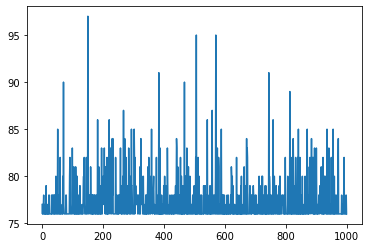

76.0
Episode: 2000


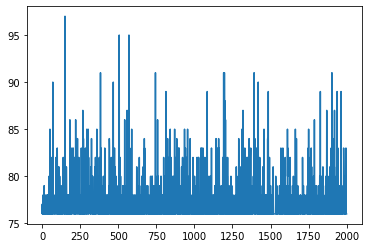

76.0
Episode: 3000


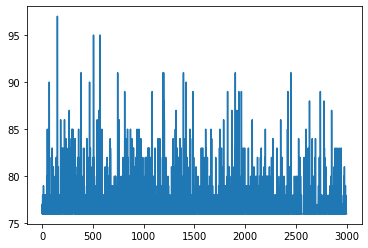

76.0
Episode: 4000


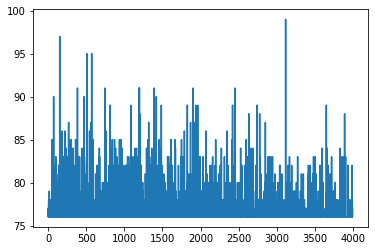

77.0
Episode: 5000


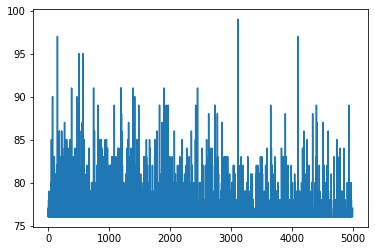

77.0
Episode: 6000


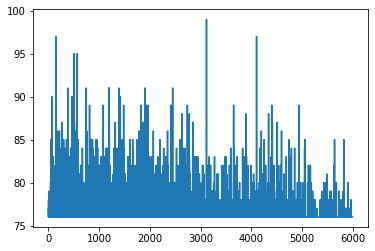

76.0
Episode: 7000


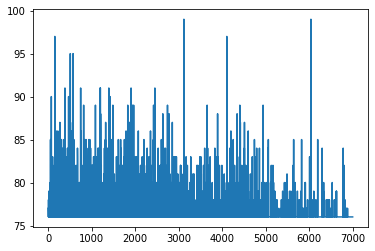

76.0
Episode: 8000


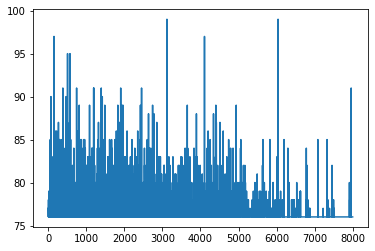

76.0
Episode: 9000


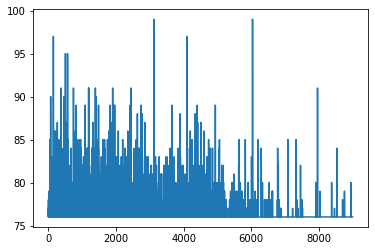

76.0
Episode: 10000


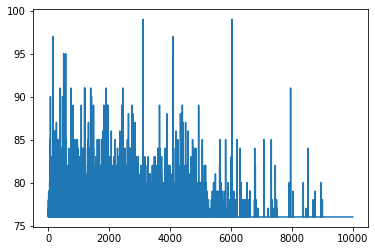

76.0
Training finished.



In [ ]:
# Hyperparameters
alpha = 0.8
gamma = 1
epsilon = 0
results  = []
# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 10001):
    state = 0

    epochs, penalties, reward, = 0, 0, 0
    done = False
    mby = np.zeros(12)
    while not done:
        if random.uniform(0, 1) < epsilon:
          action = random.randint(1,total_action) # Explore action space
        else:
            action = np.argmax(Qtable[state]) # Exploit learned values

        next_state, reward, done, info = step(state,action,mby) 
        
        old_value = Qtable[state,action]
        next_max = np.max(Qtable[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        Qtable[state,action] = new_value

        state = next_state
        epochs += 1
    result = mby[0]*7+mby[1]*5+mby[2]*5+mby[3]*1+mby[4]*9+mby[5]*7+mby[6]*5+mby[7]*2+mby[8]*4+mby[9]*4+mby[10]*6+mby[11]*4
    results.append(result)
    #print(mby,result)
    if i % 1000 == 0:
      #clear_output(wait=True)
      print(f"Episode: {i}")
      plt.plot(results)
      plt.show()
      print(result)
print("Training finished.\n")

In [ ]:
pd.DataFrame(Qtable)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-80.0,-75.997879,-75.997875,-76.02376,-75.998035,-75.997875,-75.997865,-75.997867,-75.997869,-75.997864,-76.000051,-76.007155,-76.061425
1,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62996,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62997,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62998,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
results  = []
# For plotting metrics
all_epochs = []
all_penalties = []

state = 0
epochs, penalties, reward, = 0, 0, 0
done = False
mby = np.zeros(12)
while not done:
    action = np.argmax(Qtable[state]) # Exploit learned values
    next_state, reward, done, info = step(state,action,mby) 
    next_max = np.max(Qtable[next_state])
    state = next_state
    epochs += 1
result = mby[0]*7+mby[1]*5+mby[2]*5+mby[3]*1+mby[4]*9+mby[5]*7+mby[6]*5+mby[7]*2+mby[8]*4+mby[9]*4+mby[10]*6+mby[11]*4
print(mby,result)
#clear_output(wait=True)
print(result)
print("Training finished.\n")

[1. 3. 0. 0. 1. 3. 2. 3. 2. 0. 0. 0.] 76.0
76.0
Training finished.

